# TASK 2: STOCK MARKET pREDICATION AND FORCASTING USING STACKED LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv(r'C:\Users\HP\Desktop\LGM\NSE-TATAGLOBAL.csv')
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


Text(0, 0.5, 'Close')

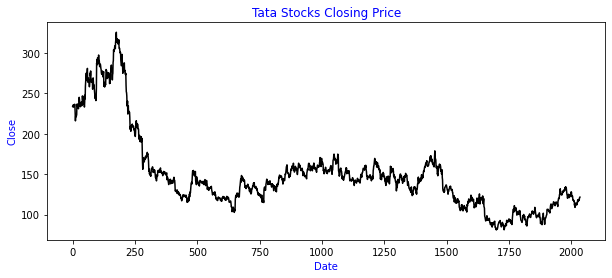

In [4]:
plt.figure(figsize= (10,4))
plt.title('Tata Stocks Closing Price',color='Blue')
plt.plot(data['Close'],color='Black')
plt.xlabel('Date',fontsize=10 , color='Blue')
plt.ylabel('Close',fontsize=10 , color='Blue')

In [5]:
data_close = data.reset_index()['Close']
data_close.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

In [6]:
from sklearn.preprocessing import MinMaxScaler
import math
import seaborn as sb
from sklearn.metrics import mean_squared_error

In [7]:
scaler= MinMaxScaler(feature_range = (0,1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1,1))
data_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [12]:
train_size =  int(len(data_close)*0.85)
test_size = len(data_close)- train_size
train_data, test_data = data_close[0: train_size,:],data_close[train_size]
train_size, test_size

(1729, 306)

In [11]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.02920752],
       [0.02328431],
       [0.01919935]])

In [20]:
def create_dataset(dataset,time_step= 1):
    X_data,Y_data = [],[]
    for i in range(len(dataset)- time_step - 1):
        a= dataset[i: (i + time_step),0]
        X_data.append(a)
        Y_data.append(dataset[i + time_step,0])
        return np.array(X_data),np.array(Y_data)

In [18]:
time_step= 100
X_train,Y_train = create_dataset(train_data,time_step)
X_test,ytest = create_dataset(test_data,time_step)
print(X_train.shape),print(Y_tarin.shape)
print(X_test.shape), print(ytest.shape)

TypeError: cannot unpack non-iterable NoneType object

In [17]:
print(X_train.shape, Y_train.shape)
print(X_test.shape , Y_test.shape)

(1, 100) (1,)


NameError: name 'X_test' is not defined